In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
cleaned_outer_london = pd.read_csv('cleaned_outer_london.csv')

In [4]:
all_out = cleaned_outer_london[cleaned_outer_london['Location'].str.startswith('C')]
all_out['Location'].unique()

array(['Court Road (Orpington by-pass)', 'Chertsey Road', 'Croydon Road',
       'Chiswick High Road', 'Chislehurst High Street',
       'Colnbrook by-pass', 'Cranbrook Road', 'Coombe Lane West',
       'Cockfosters Road', 'Crayford Way', 'Coombe Road', 'Coulsdon Road',
       'Cameron Road', 'Cann Hall Road', 'Cox Lane', 'Cudham Lane North',
       'Croham Valley Road', 'Chelsfield Lane', 'Church Hill Road',
       'Charlton Church Lane', 'Coomber Lane', 'College Road',
       'Carter Drive', 'Charlton Lane', 'Central Avenue',
       'Cannon Hill Lane', 'Corfton Road', 'Cray Valley Road',
       'Colborne Way', 'Constable Gardens', 'Culloden Road',
       'Camborne Avenue', 'Chester Road', 'Chalfont Road',
       'Chadwick Avenue', 'Conway Road', 'Canterbury Road', 'Cooper Road',
       'Cardinal Avenue', 'Conway Gardens', 'Churston Drive',
       'Cowley Bridge Lock', 'Central Park', 'Chinbrook Meadows',
       'Crane Street', 'Cator Park', 'Church Fields Recreation Ground',
       '

In [5]:
outer_chiswick = cleaned_outer_london[cleaned_outer_london['Location'] == 'Chiswick High Road']
outer_chiswick

,Survey wave (year),Site ID,Location,Weather,Time,Period,Direction,Start time,Number of male cycles,Number of female cycles,Number of unknown cycles,Total cycles
5248,2015,OUTCY042,Chiswick High Road,Dry,0600 - 0615,Early Morning,Eastbound,06:00,13,0,0,13
5249,2015,OUTCY042,Chiswick High Road,Dry,0615 - 0630,Early Morning,Eastbound,06:15,8,3,0,11
5250,2015,OUTCY042,Chiswick High Road,Dry,0630 - 0645,Early Morning,Eastbound,06:30,16,1,0,17
5251,2015,OUTCY042,Chiswick High Road,Dry,0645 - 0700,Early Morning,Eastbound,06:45,25,0,0,25
5252,2015,OUTCY042,Chiswick High Road,Dry,0700 - 0715,AM peak,Eastbound,07:00,38,1,0,39
...,...,...,...,...,...,...,...,...,...,...,...,...
323559,2021,OUTCY042,Chiswick High Road,Dry,2045 - 2100,Evening,Westbound,20:45,21,5,0,26
323560,2021,OUTCY042,Chiswick High Road,Dry,2100 - 2115,Evening,Westbound,21:00,14,1,0,15
323561,2021,OUTCY042,Chiswick High Road,Dry,2115 - 2130,Evening,Westbound,21:15,16,0,0,16
323562,2021,OUTCY042,Chiswick High Road,Dry,2130 - 2145,Evening,Westbound,21:30,18,0,0,18


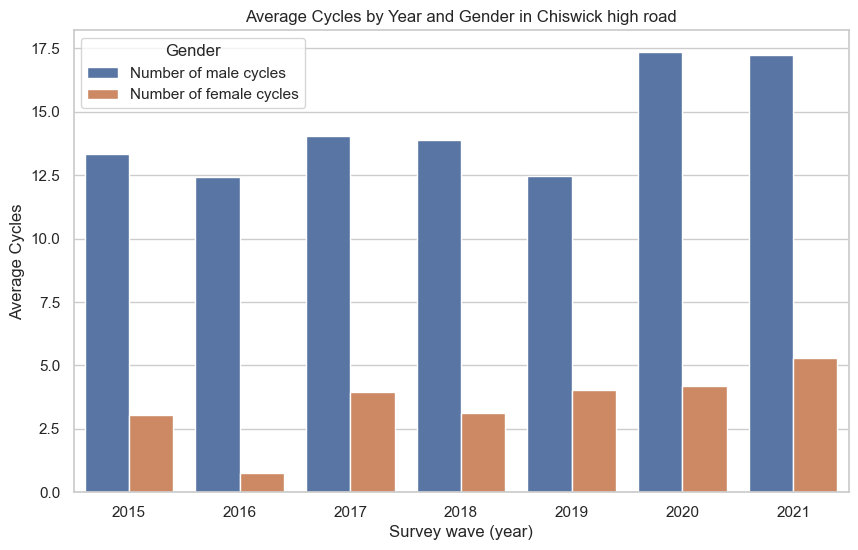

In [6]:
average_cycles_by_year = outer_chiswick.groupby('Survey wave (year)')[['Number of male cycles', 'Number of female cycles']].mean().reset_index()

# Melt the DataFrame for better Seaborn plotting
average_cycles_by_year = pd.melt(average_cycles_by_year, id_vars='Survey wave (year)', var_name='Gender', value_name='Average Cycles')

# Create a Seaborn plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='Survey wave (year)', y='Average Cycles', hue='Gender', data=average_cycles_by_year)
plt.title('Average Cycles by Year and Gender in Chiswick high road')
plt.show()

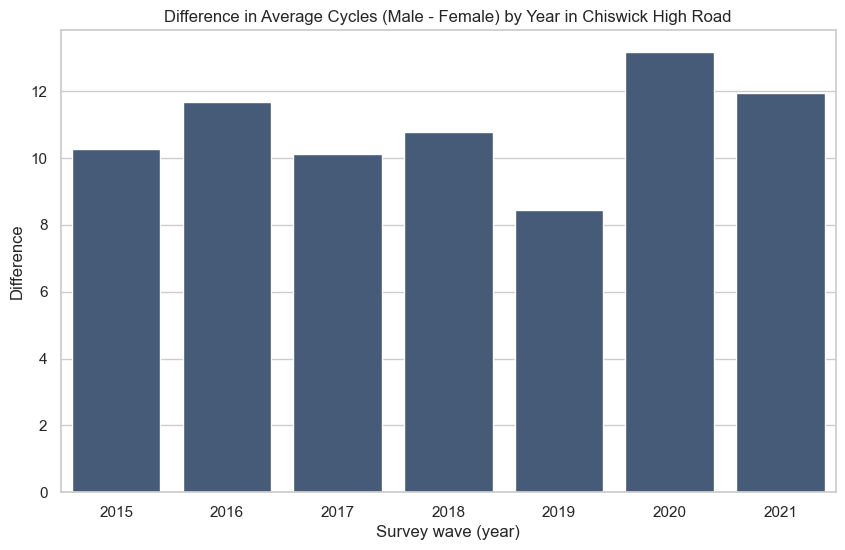

In [8]:
average_cycles_by_year = outer_chiswick.groupby('Survey wave (year)')[['Number of male cycles', 'Number of female cycles']].mean().reset_index()

# Calculate the difference between male and female average cycles
average_cycles_by_year['Difference'] = average_cycles_by_year['Number of male cycles'] - average_cycles_by_year['Number of female cycles']

# Create a Seaborn barplot for the difference
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='Survey wave (year)', y='Difference', data=average_cycles_by_year, color='#3d5a80')
plt.title('Difference in Average Cycles (Male - Female) by Year in Chiswick High Road')
plt.show()

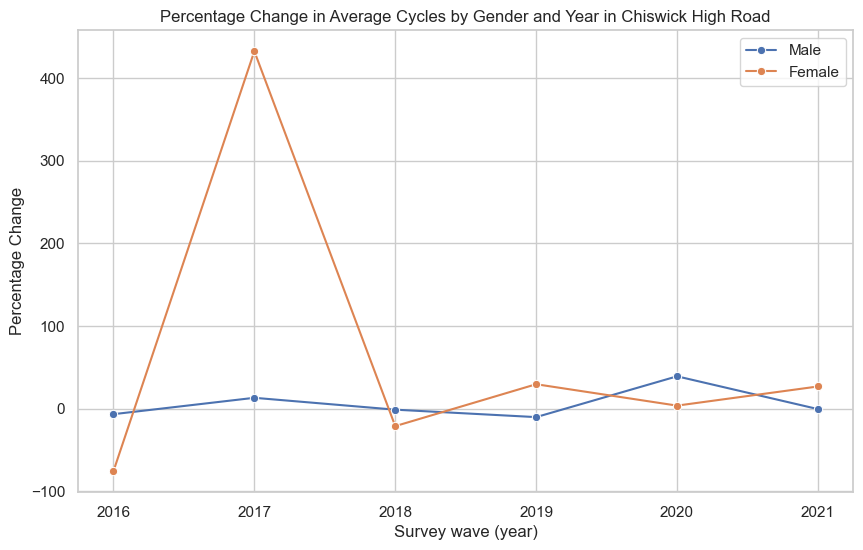

In [9]:
average_cycles_by_year['Male Percentage Change'] = average_cycles_by_year['Number of male cycles'].pct_change() * 100
average_cycles_by_year['Female Percentage Change'] = average_cycles_by_year['Number of female cycles'].pct_change() * 100

# Create a Seaborn lineplot for the percentage change
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x='Survey wave (year)', y='Male Percentage Change', data=average_cycles_by_year, label='Male', marker='o')
sns.lineplot(x='Survey wave (year)', y='Female Percentage Change', data=average_cycles_by_year, label='Female', marker='o')
plt.title('Percentage Change in Average Cycles by Gender and Year in Chiswick High Road')
plt.ylabel('Percentage Change')
plt.legend()
plt.show()